<a href="https://colab.research.google.com/github/yfhkucing/regression_bms/blob/master/Model_revisi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd

In [105]:
feature = pd.read_excel('/content/input_big_4.xlsx',sheet_name='Sheet2')
label = pd.read_excel('/content/data_big_4.xlsx', sheet_name='Sheet2')

In [107]:
feature

,Jendela_1,Jendela_2,Jendela_3,Jendela_4,Jendela_5,Jendela_6,Jendela_7,Jendela_8,Jendela_9,AC,...,Fan i/3,Fan i/4,Fan i/5,Fan i/6,Fan o/1,Fan o/2,Fan o/3,Fan o/4,Fan o/5,Fan o/6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5756,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5757,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5758,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [108]:
label

,koor_x,koor_y,Vx,Vy,Temp
0,1,30,0.002399,-0.073255,27.417225
1,1,63,0.002269,-0.075449,27.366829
2,1,94,0.002446,-0.076216,27.273479
3,1,113,0.002551,-0.073114,27.065680
4,1,145,0.002307,-0.072831,26.763813
...,...,...,...,...,...
5755,104,68,0.032203,0.101951,26.107449
5756,104,102,0.095899,0.079573,25.759459
5757,104,125,0.055757,0.087645,25.356976
5758,104,161,0.044939,0.072076,24.928185


In [109]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

In [110]:
array_x = []

for i in range(30):
  frame= feature[i::30]
  frame= norm(frame)
  array_x.append(frame)

In [111]:
#data input tiap skenario untuk titik 1-30
array_x[29].describe()

,Jendela_1,Jendela_2,Jendela_3,Jendela_4,Jendela_5,Jendela_6,Jendela_7,Jendela_8,Jendela_9,AC,...,Fan i/3,Fan i/4,Fan i/5,Fan i/6,Fan o/1,Fan o/2,Fan o/3,Fan o/4,Fan o/5,Fan o/6
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.750000,0.500000,0.250000,0.750000,0.500000,0.500000,0.750000,0.500000,0.250000
std,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,...,0.501307,0.434145,0.501307,0.434145,0.434145,0.501307,0.501307,0.434145,0.501307,0.434145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,1.000000,0.500000,0.000000,1.000000,0.500000,0.500000,1.000000,0.500000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
array_y = []

for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y','Temp'],axis=1)
  frame = norm(frame)
  array_y.append(frame)

In [113]:
#data output tiap skenario untuk titik 1-30
array_y[29].describe()

,Vx,Vy
count,192.000000,192.000000
mean,0.631227,0.509991
std,0.149760,0.213229
min,0.000000,0.000000
25%,0.570518,0.335606
50%,0.641890,0.517523
75%,0.709310,0.664939
max,1.000000,1.000000


In [114]:
! mkdir models

y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(30):
  x = array_x[i]
  y = array_y[i]
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = Lasso(alpha=0.1)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'/content/models/model {i}')

mkdir: cannot create directory ‘models’: File exists


In [115]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(30):
  model = joblib.load(f'/content/models/model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [116]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [117]:
skor_r2.shape, rmse.shape, y_predict.shape, y_testing.shape

((30,), (30,), (30, 48, 2), (30, 48, 2))

In [118]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

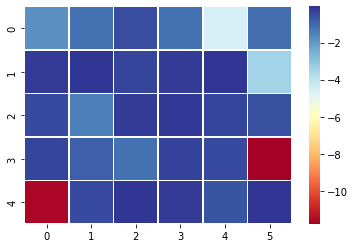

In [119]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

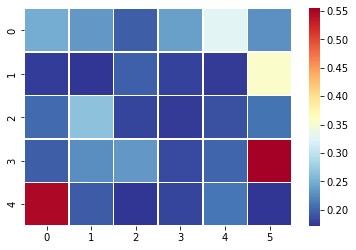

In [120]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

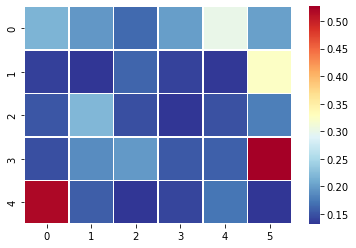

In [121]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [86]:
scenarios = 0   #0-28
indexing = 0    # vx,vy,temp

In [87]:
a = y_testing[(...,scenarios,indexing)]
b = y_predict[(...,scenarios,indexing)]
a = np.array(a)
b = np.array(b)
a = a.reshape(5,6)
b = b.reshape(5,6)
print('reshaped')

reshaped


In [122]:
df_koor_x = pd.DataFrame(label['koor_x'])
df_koor_y = pd.DataFrame(label['koor_y'])
df_koor = df_koor_x.join(df_koor_y)

In [123]:
'''
def suhu(y):
  df_y = pd.DataFrame(y[...,scenarios,0])
  df_z = pd.DataFrame(y[...,scenarios,2])
  df_z.rename(columns={0:1},inplace=True)
  df_y = df_y.join(df_z)
  df_y = df_y.join(df_koor)
  df_y.rename(columns={0:'Vx',1:'suhu'},inplace=True)
  df_y.pop('Vx')
  return df_y
  '''

In [90]:
'''
suhu_test = suhu(y_testing)
suhu_pred = suhu(y_predict)
'''

In [ ]:
#r2(suhu_test['suhu'],suhu_pred['suhu']), mse(suhu_test['suhu'],suhu_pred['suhu']), mae(suhu_test['suhu'],suhu_pred['suhu'])

In [ ]:
'''
import plotly.graph_objects as go
fig = go.Figure(data =
    go.Contour(
        z = suhu_test['suhu'].tolist(),
        x = suhu_test['koor_x'].tolist(),
        y = suhu_test['koor_y'].tolist()
    ))
fig.show()
'''

In [ ]:
'''
import plotly.graph_objects as go
from plotly.figure_factory import create_quiver
fig = go.Figure(data =
    go.Contour(
        z = suhu_pred['suhu'].tolist(),
        x = suhu_pred['koor_x'].tolist(),
        y = suhu_pred['koor_y'].tolist()
    ))
fig.show()\
'''

In [150]:
scenarios = 47

In [151]:
def kec_angin(y):
  df_x = pd.DataFrame(y[...,scenarios,0])
  df_y = pd.DataFrame(y[...,scenarios,1])
  df_y.rename(columns={0:1},inplace=True)
  df_x = df_x.join(df_y)
  df_x = df_x.join(df_koor)
  df_x.rename(columns={0:'Vx',1:'Vy',},inplace=True)
  return df_x

In [152]:
angin_test = kec_angin(y_testing)
angin_pred = kec_angin(y_predict)

In [153]:
def tampilan_vektor(Y,scale,arrow):
  x = Y['koor_x']
  y = Y['koor_y']
  u = Y['Vx']
  v = Y['Vy']

  fig = create_quiver(x,y,u,v, scale=scale, arrow_scale=arrow)
  
  fig.show()

In [154]:
tampilan_vektor(angin_test,25,0.1)

In [155]:
tampilan_vektor(angin_pred,25,0.1)